In [51]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import json

In [52]:
semeval = pd.read_csv(
    "semeval.txt",
    sep='\t',
    header=None,
    names=['tweet_id', 'hashtag', 'label', 'text'],
    encoding='utf-8',
    quoting=3
)

sst = pd.DataFrame(load_dataset("SetFit/sst5")["test"])

Repo card metadata block was not found. Setting CardData to empty.


In [53]:
semeval['label'] = semeval['label'].map({-2: 0, -1: 1, 0: 2, 1: 3, 2: 4})
semeval = semeval.drop(columns=['tweet_id'])
sst = sst.drop(columns=['label_text'])

In [54]:
sst.sample(5)

,text,label
62,it represents better-than-average movie-making...,4
1907,the cast is uniformly excellent ... but the fi...,2
2112,there has been much puzzlement among critics a...,1
1486,"... both hokey and super-cool , and definitely...",3
564,"like most bond outings in recent years , some ...",1


In [68]:
semeval.sample(5)

,hashtag,label,text
886,#Libya,2,Top 10 Countries with the Deadliest Roadshttps...
8564,medical marijuana,2,Download Marijuana Medical Handbook: Practical...
2446,#stillwithher,3,What will it take for Democrats to woo the whi...
5767,cy young,1,@justinverlander everyone in the country is wo...
12234,westworld,2,Always keep up to date with #Westworld try a f...


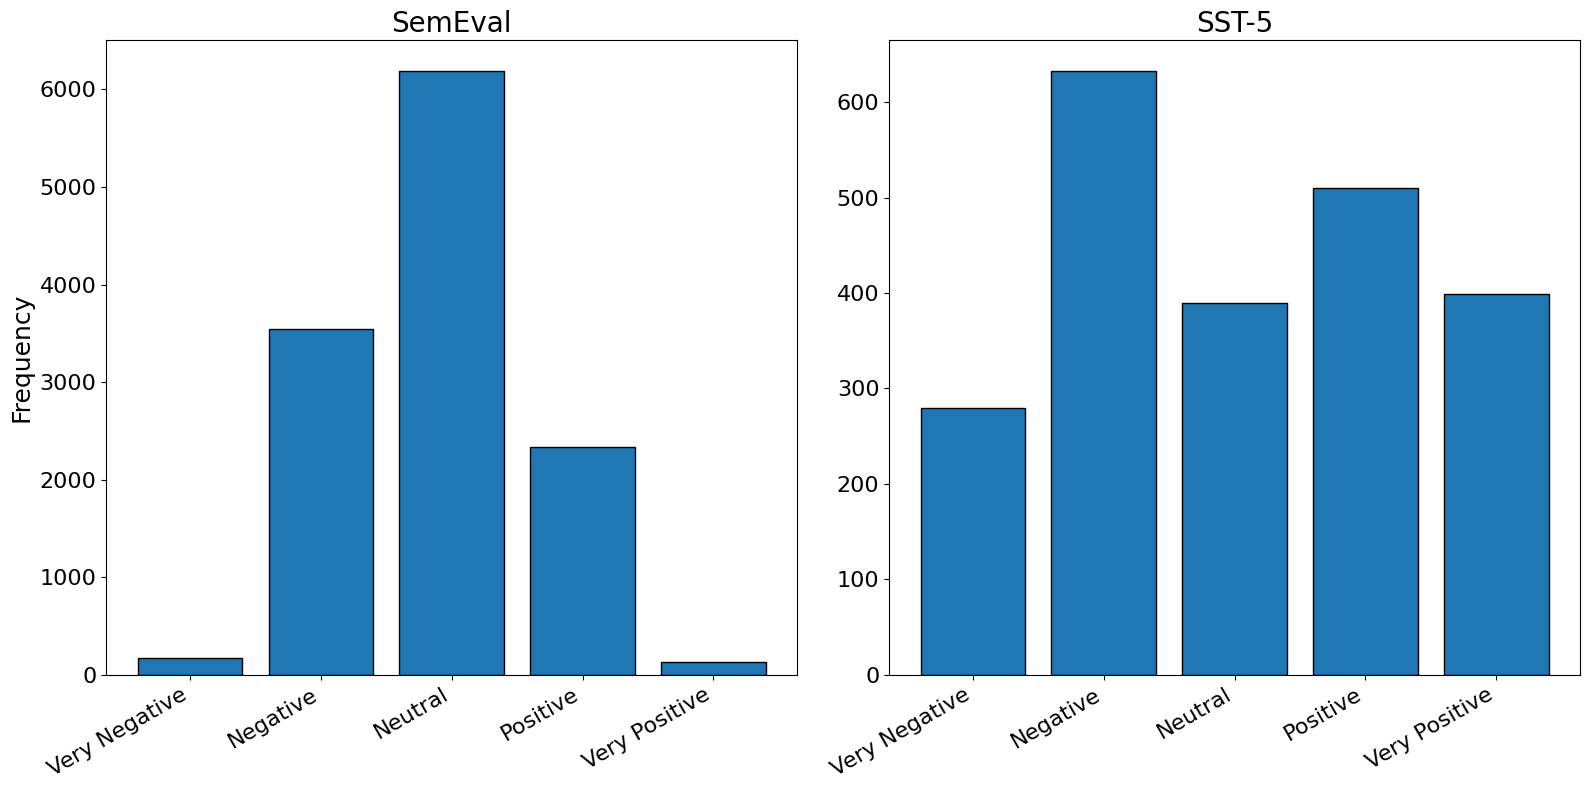

In [56]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(1, 2, figsize=(16, 8))
labels = ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']

axes[0].hist(semeval["label"].values, bins=np.arange(6)-0.5, edgecolor="black", rwidth=0.8)
axes[1].hist(sst["label"].values, bins=np.arange(6)-0.5, edgecolor="black", rwidth=0.8)

for ax in axes:
    ax.set_xticks(np.arange(5))
    ax.set_xticklabels(labels, rotation=30, ha='right', fontsize=16)
    ax.tick_params(axis='y', labelsize=16)

axes[0].set_ylabel("Frequency", fontsize=18)

axes[0].set_title("SemEval", fontsize=20)
axes[1].set_title("SST-5", fontsize=20)

plt.tight_layout()
plt.show()

In [57]:
from prediction import Predictor
from tqdm.autonotebook import tqdm

models = []

prompt_sst = "a"

prompt_semeval = "a"

for model in models:
    responses = []
    
    Model_obj = Predictor(model, prompt_sst)
    for _, test_instance in tqdm(sst.iterrows(), total=sst.shape[0], desc=f"{model} SST-5"):
        response = Model_obj.predict(test_instance["text"])
        response["true_label"] = test_instance["label"]
        responses.append(response)
    with open(f"{model}_sst", "w", encoding="utf-8") as f:
        json.dump(responses, f)
        
    responses = []

    Model_obj = Predictor(model, prompt_semeval)
    for _, test_instance in tqdm(semeval.iterrows(), total=semeval.shape[0], desc=f"{model} SemEval"):
        response = Model_obj.predict(f"{test_instance['hashtag']}\n{test_instance['text']}")
        response["true_label"] = test_instance["label"]
        responses.append(response)
    with open(f"{model}_semeval", "w", encoding="utf-8") as f:
        json.dump(responses, f)

### LLaMA, Mistral, Mixtral, OLMo, Qwen, Gemma, Aya, DeepSeek, Phi

- deepseek-r1:32b
- gpt-oss:20b
- llama3.2:latest
- llama3.1:8b
- mistral:7b
- mistral-nemo:12b
- mistral-small:24b
- mistral-small3.1:24b
- mistral-small3.2:24b
- zephyr:7b
- olmo2:7b
- olmo2:13b
- qwen2.5:7b
- qwen2.5:14b
- qwen2.5:32b
- qwen3:30b
- qwen3:14b
- qwen3:8b
- gemma3:27b
- gemma3:12b
- gemma3:4b
- gemma2:27b
- gemma2:9b
- gemma2:2b
- aya:35b
- aya:8b
- phi3:14b
- phi3:3.8b
- phi3.5:3.8b
- phi4:14b
- phi4-mini:3.8b
- phi4-reasoning:14b

In [58]:
import os

json_files = [f for f in os.listdir() if any(f.endswith(suffix) for suffix in ["_sst", "_semeval"])]

all_responses = []

for file in json_files:
    with open(file, "r", encoding="utf-8") as f:
        responses = json.load(f)
        if file.endswith("_sst"):
            model = file[:-4]
            dataset = sst
        else:
            model = file[:-8]
            dataset = semeval
        for r in responses:
            r["model"] = model
            r["dataset"] = dataset
            all_responses.append(r)

with open("all_results", encoding="utf-8") as f:
    json.dump(all_responses, f)

FileNotFoundError: [Errno 2] Aucun fichier ou dossier de ce nom: 'all_results'

In [ ]:
merged_df = pd.DataFrame(all_responses)
merged_df.head()